# <b>Hierarchical Clustering</b>

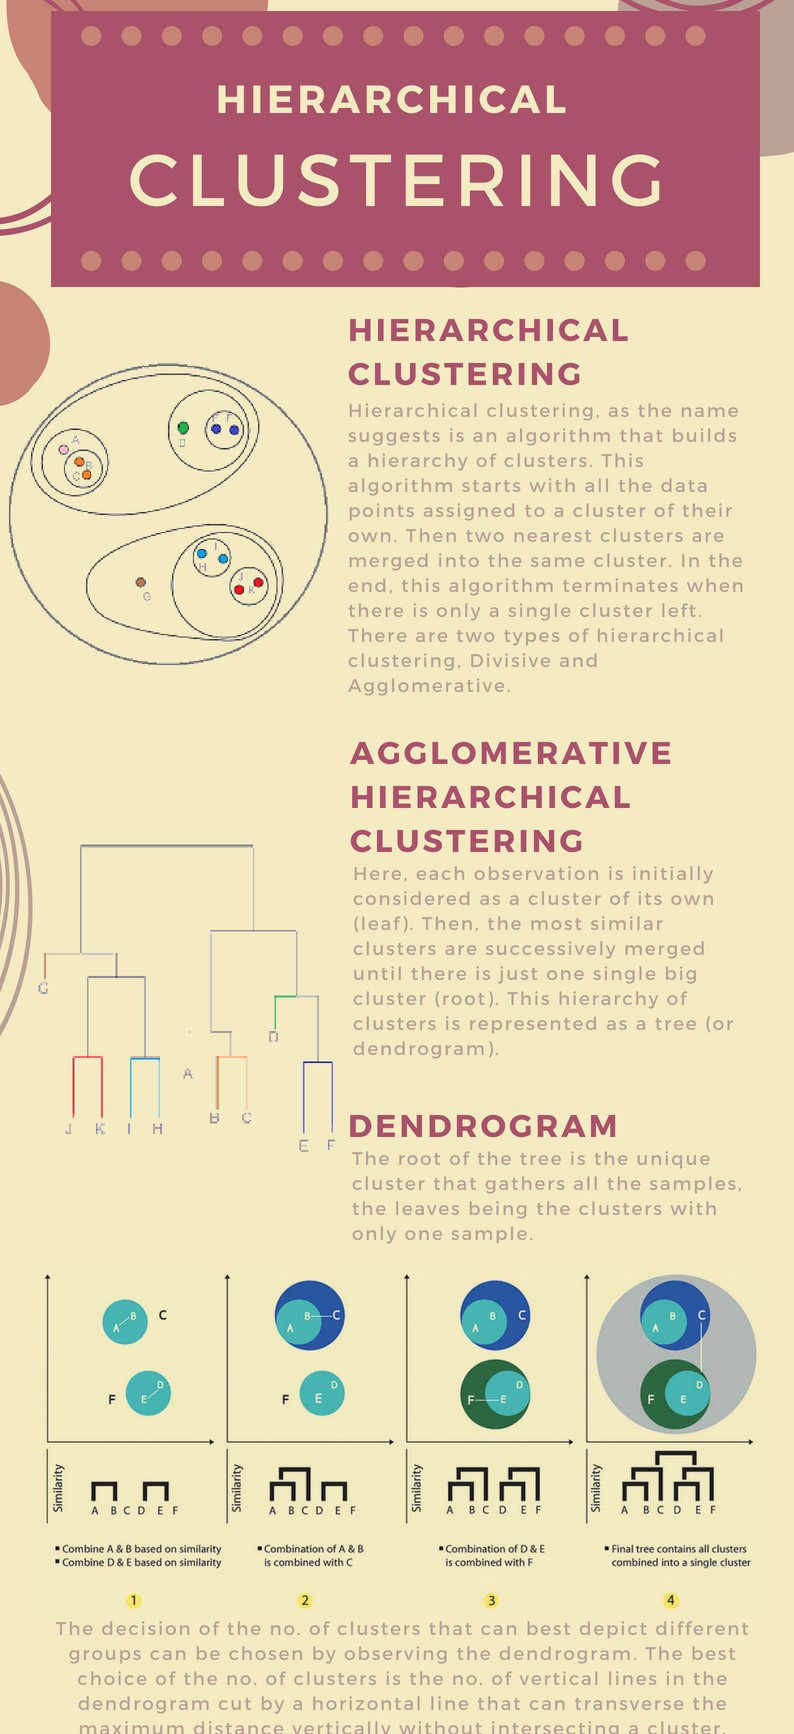

## Important Note
<h4>There are two types of hierarchical clustering:</h4>
<ol>
    <li>Agglomerative</li>
    <li>Divisive</li>
</ol>
<h4>Here, we look at <b>Agglomerative Hierarchical Clustering</b></h4>
<h4>It includes the following algorithm:</h4>
<ul>
    <li>Step 1: Make each data point a single point cluster. This forms N clusters where N is the total number of points.</li>
    <li>Step 2: Take the two closest data points and make them one cluster. This forms N-1 clusters.</li>
    <li>Step 3: Take the two closesr clusters and make them one cluster. This forms N-2 clusters.</li>
    <li>Step 4: Repeat step 3 until there is only one cluster.</li>
    <li>FINISH</li>
</ul>
<h3>Lets Implement This 🙌</h3>
<hr>

## Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
dataset = pd.read_csv("datasets/Mall_Customers.csv")
#selecting all values of indexes 3 and 4 which are annual income and spending score
X = dataset.iloc[:, [3,4]].values
Y = dataset.iloc[:,3];

## Splitting the dataset into the Training and Testing set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size = 0.2, random_state = 0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

## Dendrogram to find the optimal number of clusters

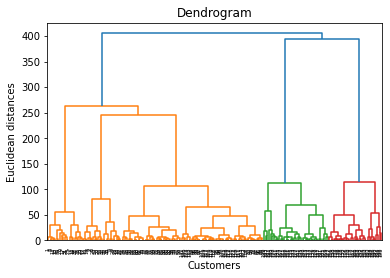

In [8]:
import scipy.cluster.hierarchy as sch   #importing cluster.hierarchy from scipy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))  #using dendogram function and inputting linkage function as its argument. Method ward is used for minimizing variance inside clusters
plt.title('Dendrogram') #Naming Title of graph
plt.xlabel('Customers') #Naming entity being represented on x axis
plt.ylabel('Euclidean distances') #Naming entity being represented on y axis
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering  
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward') #hc is an object of AgglomerativeClustering. We specify Number of clusters as 5 based on dendograms, affinity is the distance method you want to use. 
y_hc = hc.fit_predict(X)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


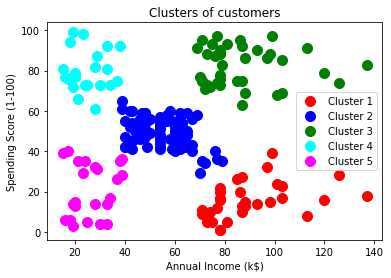

In [10]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()